### Setup

In [1]:
import numpy as np
from matplotlib import ticker
from matplotlib import pyplot as plt
import scipy.ndimage.filters as filters

In [2]:
import sys
sys.path.append('../HPOlib2/')

In [3]:
from hpolib.benchmarks.synthetic_functions.goldstein_price import GoldsteinPrice, AbstractBenchmark
from hpolib.benchmarks.synthetic_functions.branin import Branin
from hpolib.benchmarks.synthetic_functions.sin_two import SinTwo
from hpolib.benchmarks.synthetic_functions.sin_one import SinOne

## Get plottable data

In [4]:
def get_data(func: AbstractBenchmark, points: int=700):
    """
    func: Synthetic 2D function to plot
    points: Number of points on x and y
    
    returns: x [nd-array(m, )], y [nd-array(n, )], z [nd-array(m, n)]
    """
    meta = func.get_meta_information()
    x = np.linspace(meta['bounds'][0][0], meta['bounds'][0][1], points)
    y = np.linspace(meta['bounds'][1][0], meta['bounds'][1][1], points)
    zz = []
    gp = func()
    for i in x:
        zz.append([])
        for j in y:
            zz[-1].append(gp([i, j]))
    zz = np.array(zz)
    return x, y, zz

def get_data1D(func, points=1000):
    """
    func: Synthetic 1D function to plot
    points: Number of points on x and y
    
    returns: x [nd-array(m, )], y [nd-array(m, )]
    """
    meta = func.get_meta_information()
    x = np.linspace(meta['bounds'][0][0], meta['bounds'][0][1], points)
    gp = func()
    y = []
    for i in x:
        y.append(gp([i]))
    return x, np.array(y)

## Plotting

In [5]:
def plot_data(x: np.ndarray, y: np.ndarray, zz: np.ndarray,
              neighbors: int=125, logy: bool=True):
    """
    Plot 2D data
    x: Points on the x-axis
    y: Points on the y-axis
    zz: Points on the z-axis for each (x, y) pair
    neighbors: Number of neighbors to determine local optimum
    logy: Log-transform the zz data. Allows for better vizualisation of the optima
    """
    # get local optima indices, look only at neighbors to determine optimum status
    data_min = filters.minimum_filter(zz, neighbors)
    # get global optima indices. Look at all data points
    global_min = filters.minimum_filter(zz, len(zz) * len(zz[0]))
    minima = (zz == data_min)
    global_min = (zz == global_min)
    at = []
    g_min = []
    g_min_val = None
    # transform indices into actual values
    for i in range(len(zz)):
        for j in range(len(zz[i])):
            if global_min[i][j]:
                g_min.append([i, j])
                g_min_val = zz[i][j]
            elif minima[i][j]:
                at.append([i, j])
    if g_min_val:  # look if a local optimum with equal value to global optimum was falsly classified
        for val in at:
            v = zz[val[0]][val[1]]
            if np.isclose(v, g_min_val, 8):  # if they are very close to 6 decimals then they are treated as equal
                g_min.append(val)
    g_min = np.array(g_min)
    at = np.array(at)
    
    # actual plotting of the function
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    if logy:
        h = plt.contourf(x,y,np.log(zz), levels=20)
    else:
        h = plt.contourf(x,y,zz, locator=ticker.LogLocator(), levels=20)
    plt.colorbar()
    
    # plotting of the optima
    if at != []:
        plt.scatter(x[at[:, 1]], y[at[:, 0]], c='k', marker='x', s=50)
    if g_min != []:
        plt.scatter(x[g_min[:, 1]], y[g_min[:, 0]], c='r', marker='x', s=50)
    ax = plt.gca()
    ax.set_xlim([x[0], x[-1]])
    ax.set_ylim([y[0], y[-1]])
    print('Minima:',np.sum(minima))
    print('Global:', len(g_min))

def plot_data1D(x, y, neighbors=125, logy=False):
    """
    Plot 2D data
    x: Points on the x-axis
    y: Points on the y-axis
    neighbors: Number of neighbors to determine local optimum
    logy: Log-transform the zz data. Allows for better vizualisation of the optima
    """
    data_min = filters.minimum_filter(y, neighbors)
    global_min = filters.minimum_filter(y, len(y))
    minima = (y == data_min)
    global_min = (y == global_min)
    g_min = []
    at = []
    for i in range(len(y)):
        if global_min[i]:
            g_min.append(i)
        elif minima[i]:
            at.append(i)
    g_min = np.array(g_min)
    at = np.array(at)
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    if logy:
        h = plt.plot(x,np.log(y))
    else:
        h = plt.plot(x,y)
    if len(g_min) > 0:
        plt.scatter(x[g_min], y[g_min], c='r', marker='x', s=50)
    if at != []:
        plt.scatter(x[at], y[at], c='k' if len(g_min) > 0 else 'r', marker='x', s=50)
    print('Minima:', np.sum(minima))
    print('Global:', len(g_min))

## The following functions are all plotted on a logscale to better highlight optima

# Branin

/home/biedenka/anaconda3/envs/borf/lib/python3.6/site-packages/ipykernel_launcher.py:45: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
/home/biedenka/anaconda3/envs/borf/lib/python3.6/site-packages/ipykernel_launcher.py:47: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


Minima: 3
Global: 3


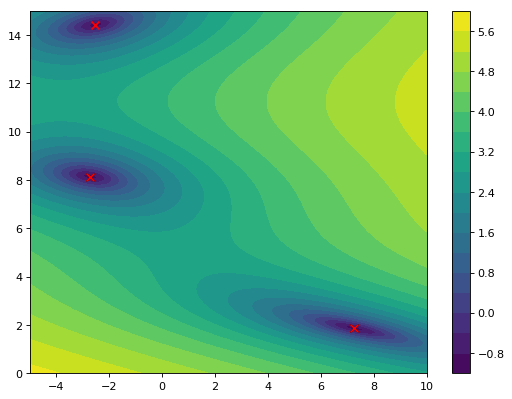

In [6]:
# Branin Test
x, y, zz = get_data(Branin)
plot_data(x, y, zz)

# GoldsteinPrice

/home/biedenka/anaconda3/envs/borf/lib/python3.6/site-packages/ipykernel_launcher.py:45: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
/home/biedenka/anaconda3/envs/borf/lib/python3.6/site-packages/ipykernel_launcher.py:47: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


Minima: 2
Global: 1


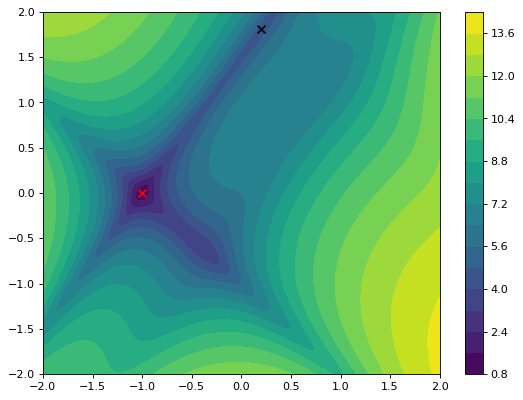

In [7]:
x, y, zz = get_data(GoldsteinPrice)
plot_data(x, y, zz)

# SinTwo

/home/biedenka/anaconda3/envs/borf/lib/python3.6/site-packages/ipykernel_launcher.py:45: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
/home/biedenka/anaconda3/envs/borf/lib/python3.6/site-packages/ipykernel_launcher.py:47: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


Minima: 49
Global: 10


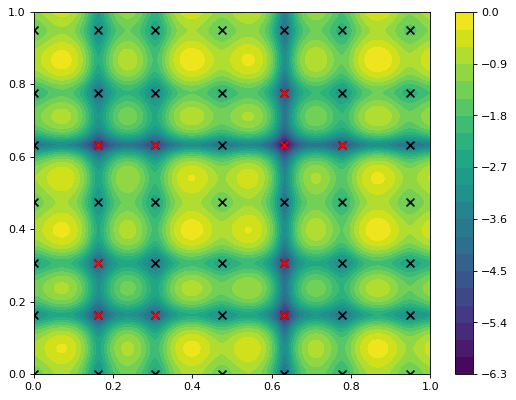

In [8]:
x, y, zz = get_data(SinTwo)
plot_data(x, y, zz, neighbors=50)

# SniOne

Minima: 7
Global: 1


/home/biedenka/anaconda3/envs/borf/lib/python3.6/site-packages/ipykernel_launcher.py:83: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


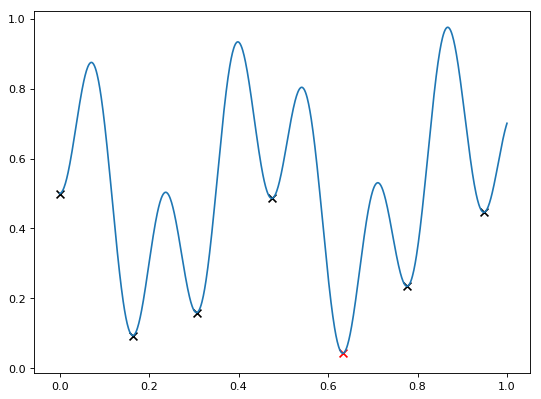

In [9]:
x, y = get_data1D(SinOne)
plot_data1D(x, y)

# Levy2D

In [10]:
import numpy as np

import ConfigSpace as CS
from hpolib.abstract_benchmark import AbstractBenchmark


class Levy2D(AbstractBenchmark):
    @AbstractBenchmark._check_configuration
    @AbstractBenchmark._configuration_as_array
    def objective_function(self, x, **kwargs):
        z = 1 + ((x[0] - 1.) / 4.)
        zz = 1 + ((x[1] - 1.) / 4.)
        s = np.power((np.sin(np.pi * z)), 2)
        y = s + ((z-1)**2) * (1 + 10*np.power(np.sin(np.pi*z + 1), 2)) + ((zz - 1) ** 2) * (1 + np.power((np.sin(2 * np.pi * zz)), 2))

        return {'function_value': y}

    def objective_function_test(self, x, **kwargs):
        return self.objective_function(x)

    @staticmethod
    def get_configuration_space():
        cs = CS.ConfigurationSpace()
        cs.generate_all_continuous_from_bounds(Levy2D.get_meta_information()['bounds'])
        return cs

    @staticmethod
    def get_meta_information():
        return {'name': 'Levy2D',
                'num_function_evals': 200,
                'optima': ([[1.0]]),
                'bounds': [[-15, 10], [-15, 10]],
                'f_opt': 0.0}

/home/biedenka/anaconda3/envs/borf/lib/python3.6/site-packages/ipykernel_launcher.py:45: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
/home/biedenka/anaconda3/envs/borf/lib/python3.6/site-packages/ipykernel_launcher.py:47: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


Minima: 77
Global: 1


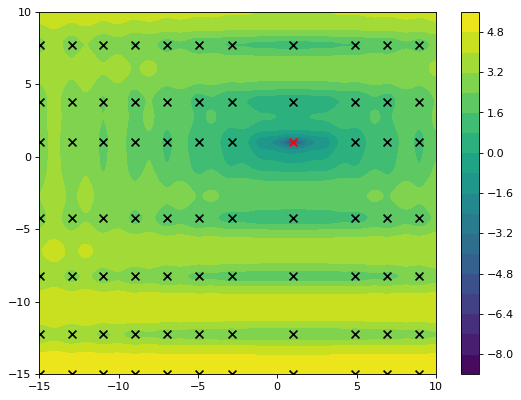

In [11]:
x, y, zz = get_data(Levy2D)
plot_data(x, y, zz, neighbors=50)